In [1]:
import numpy as np
import cv2
import glob
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras import models,layers
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.style.use("ggplot")


In [14]:
features=[]
all_labels=[]
for i,address in enumerate(glob.glob(r'C:\Users\VAIO\Desktop\DSC\PYTHON1\covid\Covid19-dataset and code\train\*\*')):
    img=cv2.imread(address)
    img=cv2.resize(img,(32,32))
    img=img/255.0  
    img=img.flatten()
    features.append(img)
    label=address.split('\\')[-2]
    all_labels.append(label)
    
    if(i%10==0):
       print('[INFO] {}/60 is processed'.format(i))

print(all_labels.count('Normal'))
print(all_labels.count('Covid'))

features=np.array(features)
le=LabelEncoder()
all_labels=le.fit_transform(all_labels)
all_labels=to_categorical(all_labels)
print(type(all_labels))
print(all_labels.shape)
x_train,x_test,y_train,y_test=train_test_split(features,all_labels,test_size=0.2)


[INFO] 0/60 is processed
[INFO] 10/60 is processed
[INFO] 20/60 is processed
[INFO] 30/60 is processed
[INFO] 40/60 is processed
[INFO] 50/60 is processed
[INFO] 60/60 is processed
34
34
<class 'numpy.ndarray'>
(68, 2)


In [19]:
print (x_train.shape)
print (x_test.shape)
print (y_test.shape)
print (y_train.shape)

(54, 3072)
(14, 3072)
(14, 2)
(54, 2)


In [20]:
net=models.Sequential([
                       layers.Dense(1500,activation="relu",input_dim=3072),
                       layers.Dense(750,activation="relu",input_dim=1500),
                       layers.Dense(325,activation="relu",input_dim=750),
                       layers.Dense(150,activation="relu",input_dim=325),
                       layers.Dense(75,activation="relu",input_dim=150),
                       layers.Dense(2,activation="softmax",input_dim=75),


                      ])
print(net.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1500)              4609500   
                                                                 
 dense_1 (Dense)             (None, 750)               1125750   
                                                                 
 dense_2 (Dense)             (None, 325)               244075    
                                                                 
 dense_3 (Dense)             (None, 150)               48900     
                                                                 
 dense_4 (Dense)             (None, 75)                11325     
                                                                 
 dense_5 (Dense)             (None, 2)                 152       
                                                                 
Total params: 6,039,702
Trainable params: 6,039,702
Non-

In [21]:
net.compile(optimizer='adam',
            metrics=["accuracy"],
            loss="categorical_crossentropy"
            )

In [22]:
out=net.fit(x_train,y_train,batch_size=16,validation_data=(x_test,y_test),epochs=25)


Epoch 1/25
4/4 [==============================] - 4s 354ms/step - loss: 1.1601 - accuracy: 0.4444 - val_loss: 0.9202 - val_accuracy: 0.4286
Epoch 2/25
4/4 [==============================] - 1s 157ms/step - loss: 1.0240 - accuracy: 0.5556 - val_loss: 0.7145 - val_accuracy: 0.4286
Epoch 3/25
4/4 [==============================] - 1s 151ms/step - loss: 0.8267 - accuracy: 0.5556 - val_loss: 0.8704 - val_accuracy: 0.4286
Epoch 4/25
4/4 [==============================] - 1s 147ms/step - loss: 0.4706 - accuracy: 0.7778 - val_loss: 0.5633 - val_accuracy: 0.6429
Epoch 5/25
4/4 [==============================] - 1s 148ms/step - loss: 0.3271 - accuracy: 0.8704 - val_loss: 0.6972 - val_accuracy: 0.7857
Epoch 6/25
4/4 [==============================] - 1s 161ms/step - loss: 0.2020 - accuracy: 0.9074 - val_loss: 0.5147 - val_accuracy: 0.7857
Epoch 7/25
4/4 [==============================] - 1s 163ms/step - loss: 0.2264 - accuracy: 0.9074 - val_loss: 0.4999 - val_accuracy: 0.7857
Epoch 8/25
4/4 [====

In [107]:
net.save('Covid MLP.h5')

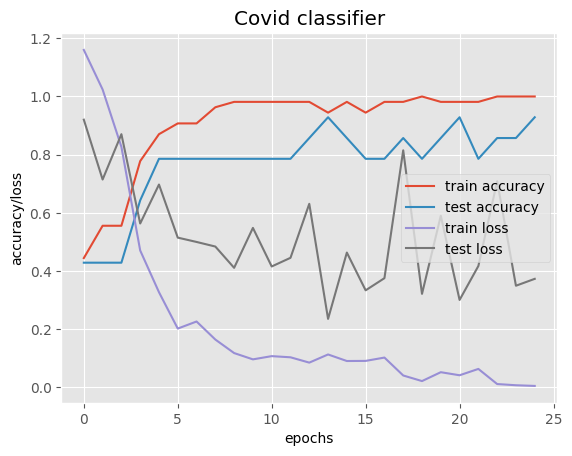

In [23]:


plt.plot(out.history["accuracy"],label="train accuracy")
plt.plot(out.history["val_accuracy"],label="test accuracy")
plt.plot(out.history["loss"],label="train loss")
plt.plot(out.history["val_loss"],label="test loss")
plt.xlabel("epochs")
plt.ylabel("accuracy/loss")
plt.title("Covid classifier")
plt.legend()
#plt.savefig('cifar classifier-with Batch norm.jpg', dpi=300)
plt.show('center')